In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
f8 = pd.read_csv('at_cluster_trng (8).txt', sep=' ', header=0)
f16 = pd.read_csv('at_cluster_trng (16).txt', sep=' ', header=0)
f32 = pd.read_csv('at_cluster_trng (32).txt', sep=' ', header=0)
f64 = pd.read_csv('at_cluster_trng (64).txt', sep=' ', header=0)
f128 = pd.read_csv('at_cluster_trng (128).txt', sep=' ', header=0)
g8 = pd.read_csv('at_met_trng (8).txt', sep=' ', header=0)
g16 = pd.read_csv('at_met_trng (16).txt', sep=' ', header=0)
g32 = pd.read_csv('at_met_trng (32).txt', sep=' ', header=0)
g64 = pd.read_csv('at_met_trng (64).txt', sep=' ', header=0)
g128 = pd.read_csv('at_met_trng (128).txt', sep=' ', header=0)

In [3]:
c_trial=int(len(f8.magnet)/10000)
m_trial=int(len(g8.magnet)/100000)
print(c_trial, m_trial)

20 20


In [4]:
start1=0
m_c_8=np.zeros((c_trial,10000-start1))
m_c_16=np.zeros((c_trial,10000-start1))
m_c_32=np.zeros((c_trial,10000-start1))
m_c_64=np.zeros((c_trial,10000-start1))
m_c_128=np.zeros((c_trial,10000-start1))
for i in range (c_trial):
    m_c_8[i]=np.array(f8.magnet[start1+10000*i:10000+10000*i])
    m_c_16[i]=np.array(f16.magnet[start1+10000*i:10000+10000*i])
    m_c_32[i]=np.array(f32.magnet[start1+10000*i:10000+10000*i])
    m_c_64[i]=np.array(f64.magnet[start1+10000*i:10000+10000*i])
    m_c_128[i]=np.array(f128.magnet[start1+10000*i:10000+10000*i])

In [5]:
start2=0
m_m_8=np.zeros((m_trial,100000-start2))
m_m_16=np.zeros((m_trial,100000-start2))
m_m_32=np.zeros((m_trial,100000-start2))
m_m_64=np.zeros((m_trial,100000-start2))
m_m_128=np.zeros((m_trial,100000-start2))
for i in range (m_trial):
    m_m_8[i]=np.array(g8.magnet[start2+100000*i:100000+100000*i])
    m_m_16[i]=np.array(g16.magnet[start2+100000*i:100000+100000*i])
    m_m_32[i]=np.array(g32.magnet[start2+100000*i:100000+100000*i])
    m_m_64[i]=np.array(g64.magnet[start2+100000*i:100000+100000*i])
    m_m_128[i]=np.array(g128.magnet[start2+100000*i:100000+100000*i])

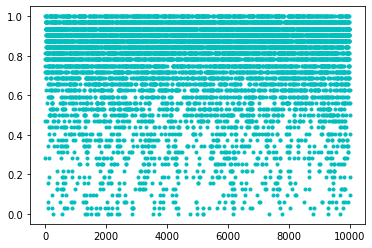

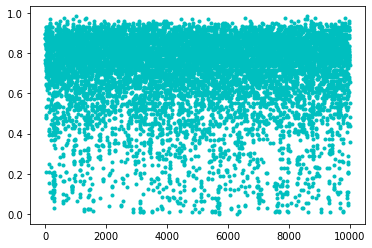

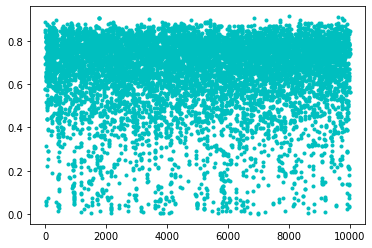

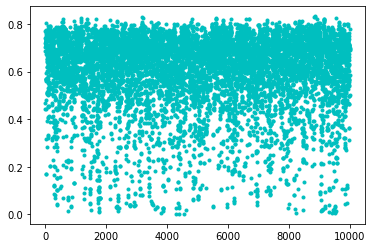

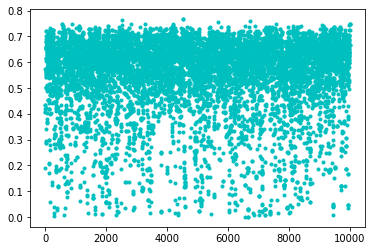

In [6]:
t=np.arange(len(m_c_8[0]))
ith=3
plt.plot(t, m_c_8[ith], 'c.')
plt.show()
plt.plot(t, m_c_16[ith], 'c.')
plt.show()
plt.plot(t, m_c_32[ith], 'c.')
plt.show()
plt.plot(t, m_c_64[ith], 'c.')
plt.show()
plt.plot(t, m_c_128[ith], 'c.')
plt.show()

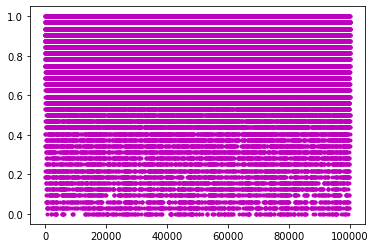

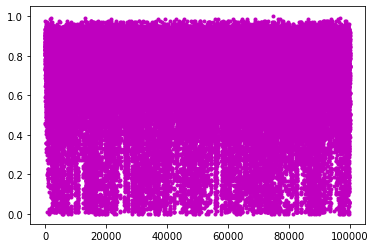

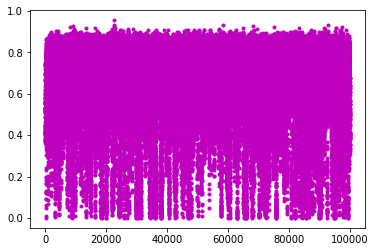

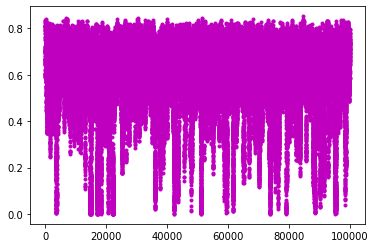

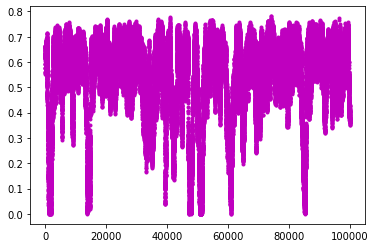

In [7]:
t2=np.arange(len(m_m_8[0]))
plt.plot(t2, m_m_8[ith], 'm.')
plt.show()
plt.plot(t2, m_m_16[ith], 'm.')
plt.show()
plt.plot(t2, m_m_32[ith], 'm.')
plt.show()
plt.plot(t2, m_m_64[ith], 'm.')
plt.show()
plt.plot(t2, m_m_128[ith], 'm.')
plt.show()

In [8]:
def old_attime(yy, n):
    c_0=np.var(yy)
    inside=0
    for i in range(1, n):
        iinside =0
        for j in range (1, n-i):
            iinside = iinside + (yy[i]-np.mean(yy))*(yy[i+j]-np.mean(yy))
        inside = inside + 1/(n-i) * iinside
    return 1+2*inside/c_0

def next_pow_2(n):
    i = 1
    while i < n:
        i = i << 1
    return i

def autocorr_func_1d(x):
    x = np.atleast_1d(x)
    nn = next_pow_2(len(x))
    f = np.fft.fft(x-np.mean(x), n=nn*2)
    acf = np.real(np.fft.ifft(f * np.conjugate(f))[:len(x)])/(4*nn)
    acf = acf / (len(x)-np.arange(len(x)))
    acf = acf/acf[0]
    return acf

def autocorr_time(yy):
    #c_0 = np.var(yy)
    A = autocorr_func_1d(yy)
    return -1+2*np.sum(A[:100])

def auto_window(taus):
    m = np.arange(len(taus)) < 5 * taus
    if np.any(m):
        return np.argmin(m)
    return len(taus) - 1
def autocorr_gw2010(y):
    f = autocorr_func_1d(y)
    taus = -1+2*np.cumsum(f)
    window = auto_window(taus)
    return taus[window]

In [9]:
c8=np.zeros((c_trial, len(m_c_8[0])))
c16=np.zeros((c_trial, len(m_c_16[0])))
c32=np.zeros((c_trial, len(m_c_32[0])))
c64=np.zeros((c_trial, len(m_c_64[0])))
c128=np.zeros((c_trial, len(m_c_128[0])))
for i in range (c_trial):
    for j in range (1, len(m_c_32[0])):
        c8[i][j]=autocorr_gw2010(m_c_8[i][:j])
        c16[i][j]=autocorr_gw2010(m_c_16[i][:j])
        c32[i][j]=autocorr_gw2010(m_c_32[i][:j])
        c64[i][j]=autocorr_gw2010(m_c_64[i][:j])
        c128[i][j]=autocorr_gw2010(m_c_128[i][:j])

/home/hyejin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide
/home/hyejin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in less


In [10]:
m8=np.zeros((m_trial, len(m_m_8[0])))
m16=np.zeros((m_trial, len(m_m_16[0])))
m32=np.zeros((m_trial, len(m_m_32[0])))
m64=np.zeros((m_trial, len(m_m_64[0])))
m128=np.zeros((m_trial, len(m_m_128[0])))
for i in range (m_trial):
    for j in range (1, len(m_m_32[0])):
        m8[i][j]=autocorr_gw2010(m_m_8[i][:j])
        m16[i][j]=autocorr_gw2010(m_m_16[i][:j])
        m32[i][j]=autocorr_gw2010(m_m_32[i][:j])
        m64[i][j]=autocorr_gw2010(m_m_64[i][:j])
        m128[i][j]=autocorr_gw2010(m_m_128[i][:j])
    print(i)

/home/hyejin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


0
1
2
3
4
5
6
7
8
9


/home/hyejin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in less


10
11
12
13
14
15
16
17
18
19


In [11]:
c8=c8/2
c16=c16/2
c32=c32/2
c64=c64/2
c128=c128/2
m8=m8/2
m16=m16/2
m32=m32/2
m64=m64/2
m128=m128/2

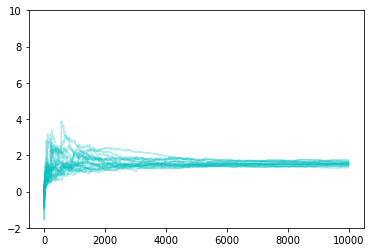

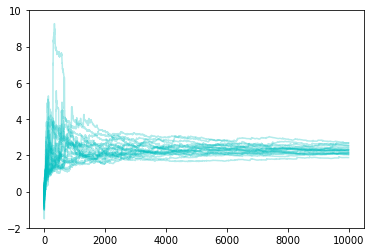

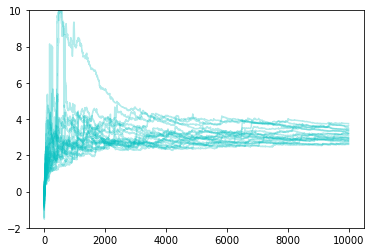

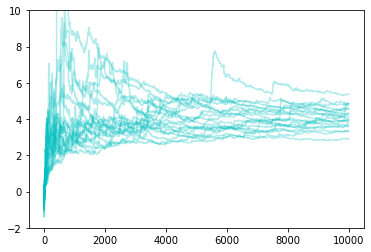

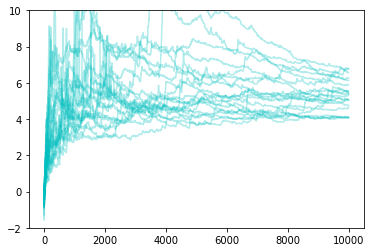

In [12]:
for k in range (c_trial):
    plt.plot(t, c8[k], 'c-', alpha=0.3)
plt.ylim(-2,  10)
plt.show()
for k in range (c_trial):
    plt.plot(t, c16[k], 'c-', alpha=0.3)
plt.ylim(-2,  10)
plt.show()
for k in range (c_trial):
    plt.plot(t, c32[k], 'c-', alpha=0.3)
plt.ylim(-2,  10)
plt.show()
for k in range (c_trial):
    plt.plot(t, c64[k], 'c-', alpha=0.3)
plt.ylim(-2,  10)
plt.show()
for k in range (c_trial):
    plt.plot(t, c128[k], 'c-', alpha=0.3)
plt.ylim(-2,  10)
plt.show()

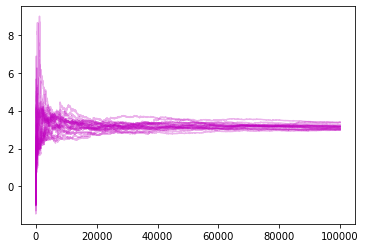

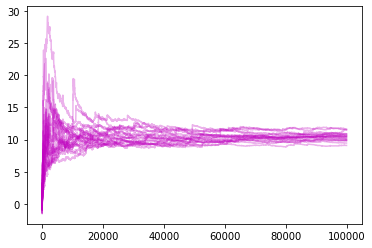

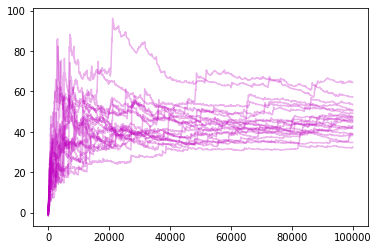

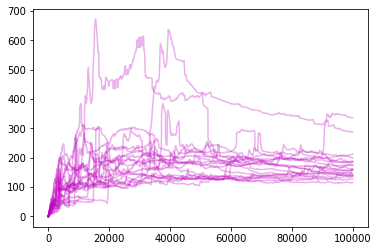

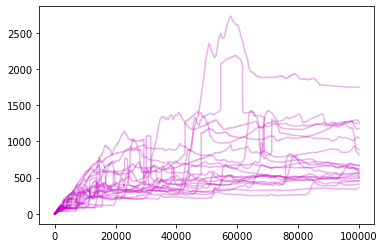

In [13]:
for k in range (m_trial):
    plt.plot(t2, m8[k], 'm-', alpha=0.3)
plt.show()
for k in range (m_trial):
    plt.plot(t2, m16[k], 'm-', alpha=0.3)
plt.show()
for k in range (m_trial):
    plt.plot(t2, m32[k], 'm-', alpha=0.3)
plt.show()
for k in range (m_trial):
    plt.plot(t2, m64[k], 'm-', alpha=0.3)
plt.show()
for k in range (m_trial):
    plt.plot(t2, m128[k], 'm-', alpha=0.3)
plt.show()

In [16]:
np.savetxt("c8.txt", c8)
np.savetxt("c16.txt", c16)
np.savetxt("c32.txt", c32)
np.savetxt("c64.txt", c64)
np.savetxt("c128.txt", c128)
np.savetxt("m8.txt", m8)
np.savetxt("m16.txt", m16)
np.savetxt("m32.txt", m32)
np.savetxt("m64.txt", m64)
np.savetxt("m128.txt", m128)